# Modeling Pipeline
Creating a Pipeline to test out each model

### Importing Libraries

In [101]:
import _pickle as pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Loading the Data
Option to use either Dataset by just commenting out the undesired one.

In [85]:
# Top 10 features Dataset
with open("Top-10-Features-Models/top10_df.pkl",'rb') as fp:
    df = pickle.load(fp)
    
# Top 10 Correlated Dataset
# with open("Top-10-Correlation-Models/top10_corr_df.pkl",'rb') as fp:
#     df = pickle.load(fp)

### Splitting the Data

In [86]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Creating a Pipeline 
Using 10 Different Classification Models

In [87]:
# Importing the 10 models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Preventing error from occuring: XGBoost causes kernel to die.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

### Creating pipelines for each model
The pipeline is able to scale the data before implementation of the classification model

In [88]:
# Adaboost
pipe_ada = Pipeline([('scale', StandardScaler()), ('clf', AdaBoostClassifier())])

# Gradient Boost
pipe_gb  = Pipeline([('scale', StandardScaler()), ('clf', GradientBoostingClassifier())])

# Random Forest
pipe_rf  = Pipeline([('scale', StandardScaler()), ('clf', RandomForestClassifier())])

# Decision Tree
pipe_dt  = Pipeline([('scale', StandardScaler()), ('clf', DecisionTreeClassifier())])

# Dummy (Baseline)
pipe_dum = Pipeline([('scale', StandardScaler()), ('clf', DummyClassifier())])

# K Nearest Neighbors
pipe_knn = Pipeline([('scale', StandardScaler()), ('clf', KNeighborsClassifier())])

# Logistic Regression
pipe_lr  = Pipeline([('scale', StandardScaler()), ('clf', LogisticRegression())])

# Naive Bayes
pipe_nb  = Pipeline([('scale', StandardScaler()), ('clf', GaussianNB())])

# Support Vector Machine
pipe_svm = Pipeline([('scale', StandardScaler()), ('clf', SVC())])

# XGBoost
pipe_xgb = Pipeline([('scale', StandardScaler()), ('clf', XGBClassifier())])

### Creating a List of Model Names and Pipelines

In [89]:
pipelines = [pipe_ada, pipe_gb, pipe_rf, pipe_dt, pipe_dum, 
             pipe_knn, pipe_lr, pipe_nb, pipe_svm, pipe_xgb]

models = ['Adaboost', 
          'GradientBoost', 
          'RandomForest', 
          'DecisionTree', 
          'Dummy(Baseline)', 
          'KNN', 
          'LogisticRegression',
          'NaiveBayes',
          'SupportVectorMachine',
          'XGBoost']

# Zipping the the strings and pipelines together and creating a dictionary
model_pipelines = dict(zip(models, pipelines))

### Fitting and Training each Pipeline
(Using default parameters initially)

In [90]:
# Looping through each Pipeline to fit and train each model
for name, pipe in model_pipelines.items():
    print(pipe)
    pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
      .

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', DummyClassifier(constant=None, random_state=None, strategy='stratified'))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-09))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
...
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])


### Classification Report for each Pipeline

In [91]:
# Dictionary containing the model names and their scores
models_f1 = {}

# Looping through each model's predictions and getting their classification reports
for name, pipe in model_pipelines.items():
    print('\n'+ name + ' (Macro Avg - F1 Score):')
    
    # Classification Report
    report = classification_report(y_test, pipe.predict(X_test), target_names=['Sell', 'Buy', 'Hold'], output_dict=True)
    f1 = report['macro avg']['f1-score']
    
    # Assigning to the Dictionary
    models_f1[name] = f1
    
    print(f1)


Adaboost (Macro Avg - F1 Score):
0.35011446984652456

GradientBoost (Macro Avg - F1 Score):
0.34342456088975953

RandomForest (Macro Avg - F1 Score):
0.3668193815060415

DecisionTree (Macro Avg - F1 Score):
0.35595108822464755

Dummy(Baseline) (Macro Avg - F1 Score):
0.32590119011414637

KNN (Macro Avg - F1 Score):
0.36259265804792146

LogisticRegression (Macro Avg - F1 Score):
0.23596022981385714

NaiveBayes (Macro Avg - F1 Score):
0.11748463119586693

SupportVectorMachine (Macro Avg - F1 Score):
0.23766873870999186

XGBoost (Macro Avg - F1 Score):
0.34205362394347105


In [92]:
# Finding the Top 3 Models
for i in sorted(models_f1, key=models_f1.get, reverse=True)[:3]:
    print(i, models_f1[i])

RandomForest 0.3668193815060415
KNN 0.36259265804792146
DecisionTree 0.35595108822464755


Choosing the best performing model based on the __Macro Average for the F1 Score__.  This is due to the fact that we want to optimize the amount of classifications (_Recall_) and reduce the amount of misclassifications (_Precision_).  _Macro Average_ is used because of the class imbalance and the desire to classify more 'Buys' and 'Sells' than 'Holds'.

However, in the end, we will be evaluating on _Precision_ Score for Macro Average.

## Top 3 Classifiers for GridSearch
1. Random Forest
2. KNN
3. Decision Tree

_(Based on Macro Avg F1-Score)_

In [93]:
# Importing Grid Search
from sklearn.model_selection import GridSearchCV

In [94]:
# Creating Parameters to iterate through for each classifier
rf_params = {'clf__n_estimators': [10,50,100,200],
             'clf__criterion': ['gini', 'entropy'],
             'clf__max_depth': [None, 2, 5],
             'clf__min_samples_split': [2,4,8],
             'clf__min_samples_leaf': [1, 2, 5]}

knn_params = {"clf__n_neighbors": [5, 25, 50, 100, 200],
              "clf__weights": ['uniform', 'distance'],
              "clf__p": [1,2]}

dt_params = {'clf__criterion': ['gini', 'entropy'],
             'clf__splitter': ['best', 'random'],
             'clf__max_depth': [None, 2, 5],
             'clf__min_samples_split': [2, 4, 8],
             'clf__min_samples_leaf': [1,3,5]}

In [95]:
# Creating a dictionary for the Top 3 Classifiers with their respective parameters
top3 = {'RandomForest': [pipe_rf, rf_params],
        'KNN': [pipe_knn, knn_params],
        'DecisionTree': [pipe_dt, dt_params]}

### GridSearching the Classifiers

In [97]:
# Dictionary storing the best estimators for each classifier
best_estimators = {}

# Grid Searching each classifier
for name, vals in top3.items():
    print(name + ' -'*30)
    
    # Grid Searching 
    gs = GridSearchCV(vals[0], vals[1] , cv=3, return_train_score=True, verbose=2, scoring='f1_macro')
    gs.fit(X_train, y_train)
    
    # Printing out the best parameters for the selected classifier
    print(name+' Best Parameters: ', gs.best_params_)
    
    # Saving the best estimators/tuned models
    best_estimators[name+'_clf'] = gs.best_estimator_

RandomForest - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   1.0s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   1.0s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.9s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50, total=   4.8s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50, total=   5.5s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, cl

[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=  17.3s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=  17.8s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10, total=   1.1s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10, total=   1.0s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2,

[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100, total=   9.5s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100, total=   9.0s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200, total=  18.3s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200, total=  17.4s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_spli

[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50, total=   3.9s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50, total=   4.0s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50, total=   4.5s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, total=   8.2s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=8, 

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total=   1.4s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total=   1.4s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total=   1.5s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=200, total=   3.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=200, total=   2.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=200, total=   2.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=100, total=   1.4s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=100, total=   1.4s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=100, total=   1.4s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=200, total=   2.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=200, total=   2.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=200, total=   3.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=50, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100, total=   1.5s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100, total=   1.5s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100, total=   1.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=   3.4s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=   3.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=   2.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   1.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   1.6s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   1.5s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200, total=   2.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200, total=   3.3s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200, total=   3.5s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   1.4s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   1.4s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   1.5s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=200, total=   2.8s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=200, total=   2.8s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=200, total=   2.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100, total=   1.4s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100, total=   1.4s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100, total=   1.5s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200, total=   2.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200, total=   3.4s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200, total=   2.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=50, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=50, total=   0.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100, total=   1.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100, total=   1.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100, total=   1.6s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200, total=   3.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200, total=   3.6s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200, total=   3.6s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100, total=   1.6s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100, total=   2.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100, total=   1.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=200, total=   3.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=200, total=   3.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=200, total=   2.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, total=   1.5s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, total=   1.4s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, total=   1.5s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=200, total=   3.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=200, total=   2.9s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=200, total=   3.5s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.4s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50 
[CV

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100, total=   3.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=   6.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=   5.6s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=   5.8s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=1

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   1.4s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   1.4s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   1.5s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   2.9s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 
[

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   1.5s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   2.9s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   3.4s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   3.2s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=20

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=10, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50, total=   1.5s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50, total=   1.4s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50, total=   1.5s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100, total=   3.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100, total=   2.8s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100, total=   3.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=20

[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=10, total=   1.6s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50, total=   7.2s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50, total=   7.0s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50, total=   7.1s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf_

[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200, total=  26.7s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200, total=  28.8s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10, total=   1.3s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10, total=   1.5s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, c

[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100, total=  12.6s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100, total=  13.8s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100, total=  13.3s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200, total=  26.0s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50, total=   1.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50, total=   1.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=50, total=   1.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total=   2.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total=   2.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total=   2.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=200, total=   4.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=200, total=   4.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=200, total=   4.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50, total=   1.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50, total=   1.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=50, total=   1.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=100, total=   2.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=100, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=100, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=200, total=   3.6s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=200, total=   3.4s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__n_estimators=200, total=   3.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=50, total=   0.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=50, total=   0.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=50, total=   1.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100, total=   1.8s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=   3.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=   3.6s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=   3.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   0.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=50, total=   1.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   1.8s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=100, total=   2.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200, total=   4.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200, total=   3.5s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=2, clf__n_estimators=200, total=   4.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=10, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   1.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   1.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=50, total=   1.3s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   2.3s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   1.8s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=100, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=200, total=   3.7s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=200, total=   3.4s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=4, clf__n_estimators=200, total=   3.8s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=10, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=50, total=   1.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=50, total=   1.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=50, total=   1.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100, total=   2.3s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200, total=   3.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200, total=   3.7s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=200, total=   4.3s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=50, total=   0.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=50, total=   1.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=50, total=   1.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100, total=   2.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100, total=   1.8s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=100, total=   2.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200, total=   3.8s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200, total=   3.7s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__n_estimators=200, total=   4.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50, total=   0.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50, total=   1.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=50, total=   1.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100, total=   1.8s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100, total=   1.8s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=100, total=   2.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=200, total=   3.6s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=200, total=   3.7s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__n_estimators=200, total=   3.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50, total=   1.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50, total=   1.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50, total=   1.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, total=   1.8s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, total=   2.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=200, total=   3.8s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=200, total=   3.6s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=200 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=200, total=   3.8s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=10, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, c

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=100, total=   4.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=   8.8s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=   7.8s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__n_estimators=200, total=   8.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_spli

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=50, total=   2.3s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100, total=   3.9s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100, total=   3.6s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split=8, clf__n_estimators=100, total=   4.0s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=2, clf__min_samples_split

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10, total=   0.4s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=10, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50, total=   2.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=50, total=   1.9s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=5, clf__min_samples_split=8, cl

[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed: 57.8min finished


RandomForest Best Parameters:  {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 10}
KNN - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=uniform ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=uniform, total=   3.7s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=uniform ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s


[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=uniform, total=   3.3s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=uniform ..............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=uniform, total=   5.0s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=distance .............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=distance, total=   3.7s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=distance .............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=distance, total=   3.9s
[CV] clf__n_neighbors=5, clf__p=1, clf__weights=distance .............
[CV]  clf__n_neighbors=5, clf__p=1, clf__weights=distance, total=   6.7s
[CV] clf__n_neighbors=5, clf__p=2, clf__weights=uniform ..............
[CV]  clf__n_neighbors=5, clf__p=2, clf__weights=uniform, total=   3.3s
[CV] clf__n_neighbors=5, clf__p=2, clf__weights=uniform ..............
[CV]  clf__n_neighbors=5, clf__p=2, clf__weights=uniform, total=   2.5s
[CV] clf__n_neighbors=5, clf__p=2, clf__weights=uniform ...........

[CV]  clf__n_neighbors=200, clf__p=2, clf__weights=distance, total=   7.8s
[CV] clf__n_neighbors=200, clf__p=2, clf__weights=distance ...........
[CV]  clf__n_neighbors=200, clf__p=2, clf__weights=distance, total=   8.4s
KNN Best Parameters:  {'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'uniform'}
DecisionTree - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best 


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 16.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__spl

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=random, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best, total=   0.4s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=best 
[CV]  cl

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf_

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__cri

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf_

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__cri

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf_

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=random 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=best 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf_

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=random 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best 
[CV]  clf__cri

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__cri

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf_

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_sampl

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best, total=   0.9s
[CV] clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=3, clf__min_samples

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=best 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=1, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf_

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=best 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf_

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf_

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf_

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=best, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=best 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=2, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf_

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=best 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=4, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf_

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=best 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:114

[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=best, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=1, clf__min_samples_split=2, clf_

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=best, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=random 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitter=random, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__splitte

[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:  1.0min finished


DecisionTree Best Parameters:  {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 2, 'clf__splitter': 'best'}


### Classification Report for each Tuned Model

In [98]:
# Looping through each tuned model's predictions and getting their classification reports
for name, pipe in best_estimators.items():
    print('\nTuned '+ name + ' (Macro Avg - F1 Score):')
    
    report = classification_report(y_test, pipe.predict(X_test), target_names=['Sell', 'Buy', 'Hold'], output_dict=True)
    print(report['macro avg']['f1-score'])


Tuned RandomForest_clf (Macro Avg - F1 Score):
0.36930744029904666

Tuned KNN_clf (Macro Avg - F1 Score):
0.36259265804792146

Tuned DecisionTree_clf (Macro Avg - F1 Score):
0.3663486005195599


## Confusion Matrix for Tuned Model

Function for the Confusion Matrix

In [102]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

### Confusion Matrix for Random Forest Classifier
Also classification report

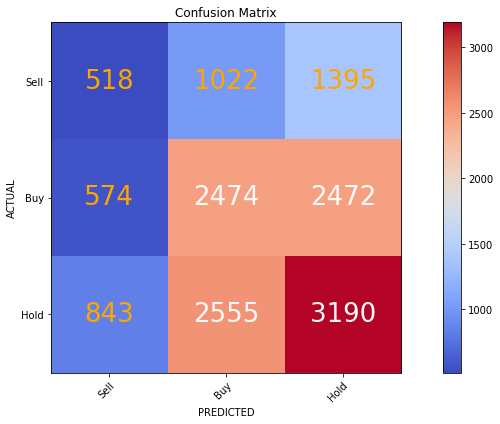

              precision    recall  f1-score   support

        Sell       0.27      0.18      0.21      2935
         Buy       0.41      0.45      0.43      5520
        Hold       0.45      0.48      0.47      6588

   micro avg       0.41      0.41      0.41     15043
   macro avg       0.38      0.37      0.37     15043
weighted avg       0.40      0.41      0.40     15043



In [104]:
plot_confusion_matrix(y_test, best_estimators['RandomForest_clf'].predict(X_test), title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

# Final Classification Report
print(classification_report(y_test, best_estimators['RandomForest_clf'].predict(X_test), target_names=['Sell', 'Buy', 'Hold']))


The __Precision__ score here is showing us that our Tuned Random Forest Classifier is correct 41% of the time for Buys and 27% of the time for Sells.  These numbers may not be the best but they still beat out the baseline model's.